In [2]:
%matplotlib inline
import random
import torch
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声""" 
    X = torch.normal(0, 1, (num_examples, len(w)))  # torch.normal(mean, std, size)
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) # 噪声，表示潜在的观测误差
    return X, y.reshape((-1, 1))

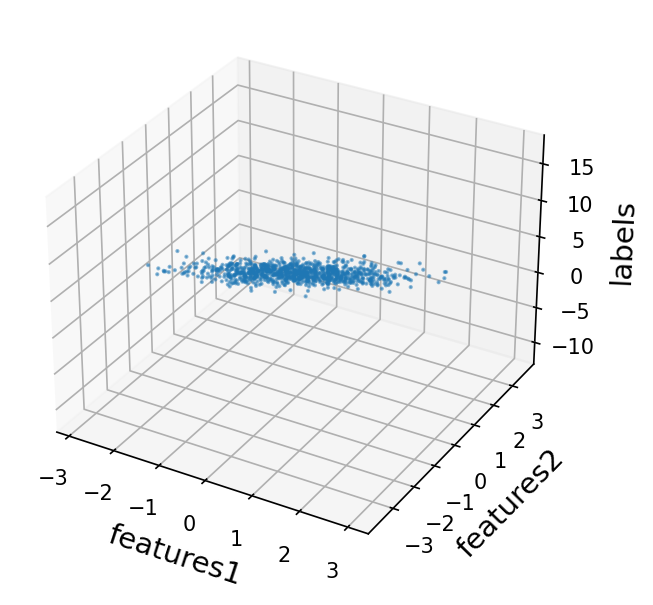

In [3]:
true_w = torch.tensor([[2], 
                       [-3.4]])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)


# fig, axes = plt.subplots(figsize=(8, 6))
fig = plt.figure(dpi=150)
axes = fig.add_subplot(111, projection='3d')
#axes = plt.subplot(111, projection='3d') 同上


# axes.scatter(features[:, 1], labels) 
# axes.plot() #折线图


axes.scatter(features[:, 0], features[:, 1], labels, s=1, alpha=0.5)
axes.set_xlabel('features1', fontsize=14)
axes.set_ylabel('features2', fontsize=14)
axes.set_zlabel('labels', fontsize=14) 
plt.show()

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices) # 洗牌
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [5]:
generation = data_iter(10, features, labels)
x, y = next(generation)
x, y

(tensor([[ 0.9983,  0.4011],
         [ 1.2217,  1.6131],
         [-1.5892,  0.9759],
         [-1.5158,  0.1305],
         [-0.2634, -0.2822],
         [-0.4814, -0.4081],
         [-1.2276,  0.6129],
         [ 1.1200, -0.9710],
         [-1.4912,  0.8367],
         [-0.5721, -0.4880]]),
 tensor([[ 4.8255],
         [ 1.1549],
         [-2.2998],
         [ 0.7116],
         [ 4.6233],
         [ 4.6328],
         [-0.3222],
         [ 9.7228],
         [-1.6468],
         [ 4.7163]]))

In [6]:
w = torch.normal(0, 0.01, (2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True) 

In [7]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [8]:
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [9]:
def sgd(params, lr, batch_size):
    """小批量梯度下降Stochastic Gradient Descent"""
    with torch.no_grad():
        """
         disables gradient calculation. 
         used during inference when you don't need to compute gradients because you're not training the model
          you can improve performance and reduce memory usage.
        """
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [10]:
lr = 0.03
num_epochs = 5
batch_size = 10

In [11]:
for epoch in range(num_epochs):
    for X, y in data_iter(10, features, labels):
        l = squared_loss(linreg(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, len(y))
    with torch.no_grad():
        train_l = squared_loss(linreg(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.028252
epoch 2, loss 0.000098
epoch 3, loss 0.000051
epoch 4, loss 0.000051
epoch 5, loss 0.000051


In [12]:
print(f'w的估计误差：{true_w - w}')
print(f'b的估计误差：{true_b - b}')

w的估计误差：tensor([[3.7980e-04],
        [2.0504e-05]], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0005], grad_fn=<RsubBackward1>)


In [13]:
features, w, b, features[:, 1]

(tensor([[ 0.4935,  1.2505],
         [-0.6122, -1.4468],
         [-2.4554, -0.7423],
         ...,
         [ 0.0980,  0.1260],
         [-1.7544,  0.1311],
         [ 1.0660,  0.5900]]),
 tensor([[ 1.9996],
         [-3.4000]], requires_grad=True),
 tensor([4.1995], requires_grad=True),
 tensor([ 1.2505e+00, -1.4468e+00, -7.4227e-01,  8.8307e-01, -3.5038e-01,
          3.3943e-01,  2.1160e+00, -4.1474e-02, -8.9160e-01,  4.6407e-01,
         -9.4805e-01,  1.1173e+00,  9.0398e-01, -4.1528e-01,  3.3282e-01,
         -1.4388e+00,  9.2446e-01,  2.0333e-01, -7.4198e-01, -1.0599e+00,
         -7.1745e-01,  3.3340e-01, -7.5710e-01, -1.0039e+00, -7.3939e-01,
         -8.1425e-02,  1.2053e+00, -7.2220e-01, -1.3391e+00, -1.9195e-01,
         -2.3604e+00, -2.2563e+00, -1.7315e+00,  1.1360e+00,  2.1505e+00,
          1.4216e+00, -3.4916e-02,  8.9012e-01, -8.8889e-01, -9.4758e-01,
         -2.9906e-01, -7.5759e-01,  1.1817e+00, -9.2773e-01, -5.6802e-01,
         -8.4388e-01, -9.6675e-01,  9.9595e

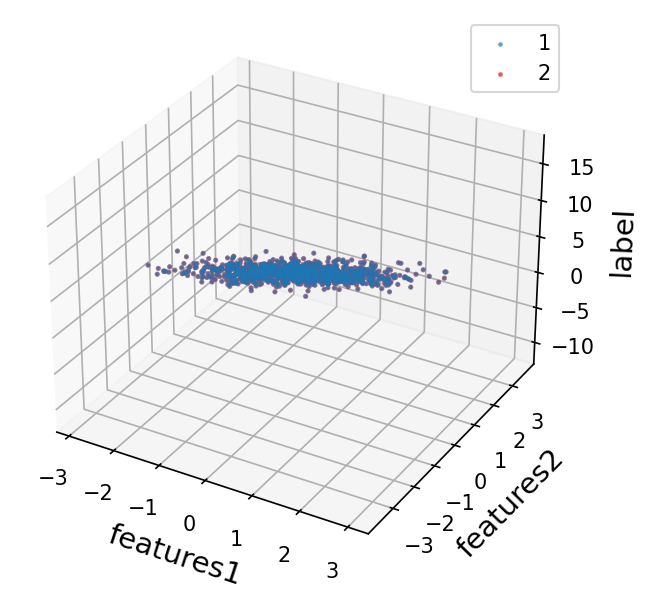

In [14]:
fig1 = plt.figure(dpi=150)
axes1 = fig1.add_subplot(111, projection='3d')

axes1.scatter(features[:, 0], features[:, 1], labels, label=1, s=2, alpha=0.5)
axes1.scatter(features[:, 0].numpy(), features[:, 1].numpy(), linreg(features, w, b).detach().numpy(), color='red', label=2, s=2, alpha=0.5)
# axes1.plot_surface()
axes1.legend()
axes1.set_xlabel('features1', fontsize=14)
axes1.set_ylabel('features2', fontsize=14)
axes1.set_zlabel('label', fontsize=14)
plt.show()

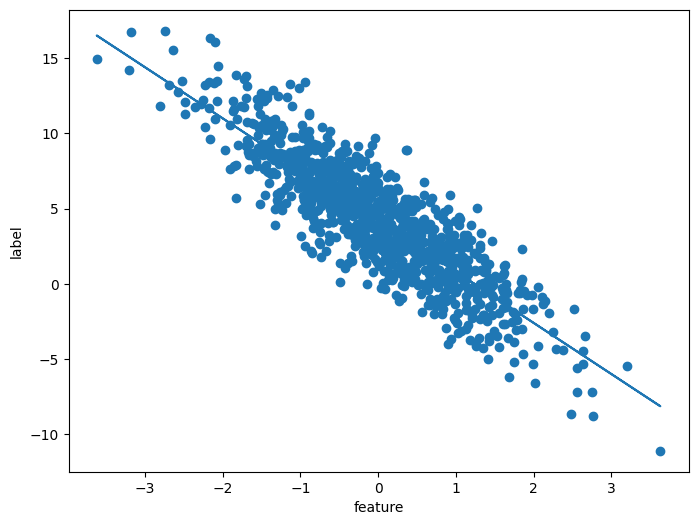

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 1], labels)
plt.plot(features[:, 1], (w[1] * features[:, 1] + b).detach().numpy())
plt.xlabel("feature")
plt.ylabel("label")
plt.show()

In [16]:
torch.matmul(features, torch.tensor([1., 1.])), torch.matmul(features, torch.tensor([[1.], [1.]]))

(tensor([ 1.7440e+00, -2.0590e+00, -3.1977e+00,  2.1171e+00, -2.1264e+00,
          3.9634e-01,  2.9333e+00,  2.6489e+00,  3.4312e-01,  6.6288e-01,
         -2.0940e+00,  8.6707e-01, -1.6488e+00, -8.5031e-01,  1.4901e+00,
         -1.5222e+00,  3.3416e+00,  9.1644e-01, -8.5387e-01, -6.4933e-01,
          1.1892e+00,  8.9632e-01, -3.0667e-01, -4.3618e-01, -1.5139e+00,
          7.4662e-01,  1.9720e-02, -1.0345e-01, -1.5891e+00,  3.1667e-01,
         -2.5950e+00, -2.0689e+00,  4.4718e-02,  1.1314e+00,  3.1333e+00,
          2.4059e+00, -1.3705e+00,  1.4334e+00, -2.1659e+00,  2.0464e+00,
          9.6528e-02, -9.8562e-01, -7.8598e-01, -1.3476e+00,  2.4472e-01,
         -2.1945e+00,  3.3878e-01,  3.0509e-01,  2.7324e+00, -3.8027e-01,
         -5.5557e-01,  6.9061e-01, -3.6886e-01,  9.6043e-01, -8.1775e-01,
          2.3092e-01, -3.1770e+00, -2.7234e-01, -2.1233e+00, -5.4553e-01,
         -7.8561e-01, -5.7157e-01, -1.7659e+00,  2.6074e-01,  1.2469e+00,
          2.2150e-01, -2.1896e+00,  1.

In [17]:
torch.matmul(torch.tensor([[1, 2]]), torch.tensor([[1], [2]]))

tensor([[5]])